In [18]:
import pandas as pd

# Import dataset

data_file = "./Data/CIS_bdpm.txt"
drugs_names = ["CIS",
         "denomination",
         "galenic_form",
         "route_of_administration",
         "clearance_status",
         "clearance_type",
         "commercialisation_status",
         "clearance_date",
         "bdm_status", 
         "clearance_id",
         "owners",
         "enhanced_monitoring"]

drugs = pd.read_table(data_file, names=drugs_names, encoding="latin-1")
drugs=drugs.set_index("CIS")
drugs.head(n=1)



,denomination,galenic_form,route_of_administration,clearance_status,clearance_type,commercialisation_status,clearance_date,bdm_status,clearance_id,owners,enhanced_monitoring
CIS,,,,,,,,,,,
61266250,"A 313 200 000 UI POUR CENT, pommade",pommade,cutanée,Autorisation active,Procédure nationale,Commercialisée,12/03/1998,NaN,NaN,PHARMA DEVELOPPEMENT,Non


Nombre de médicaments par jour dans drugs


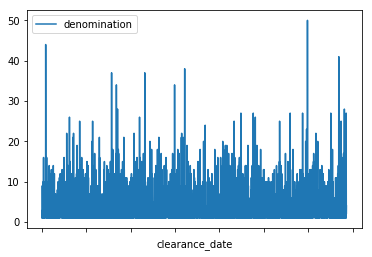

In [98]:
%matplotlib inline

print("Nombre de médicaments par jour dans drugs")
t = drugs[['clearance_date','denomination']].groupby("clearance_date").count()
t.plot()

In [117]:
import datetime

print("SOME STATISTICS ON DRUGS")
print("# of unique route of administration possible: %i" % len(drugs.route_of_administration.unique()))
print("# of unique clearance status: %i" % len(drugs.clearance_status.unique()))
print("# of unique clearance type: %i" % len(drugs.clearance_type.unique()))
print("# of unique commercialisation_status : %i" % len(drugs.commercialisation_status.unique()))
print("# of unique owners : %i" % len(drugs.owners.unique()))




SOME STATISTICS ON DRUGS
# of unique route of administration possible: 133
# of unique clearance status: 5
# of unique clearance type: 8
# of unique commercialisation_status : 2
# of unique owners : 628


In [127]:
#pd.to_datetime(drugs['clearance_date'])


TypeError: <class 'pandas.core.series.Series'> is not convertible to datetime

In [24]:
forms_names = ["CIS",
              "CIP7",
              "label",
              "administrative_status",
              "commercialisation_status",
               "commercialisation_date",
              "CIP13",
              "collectivities_aggreement",
              "reinbursement_rate",
              "price",
               "total_price",
               "dispensing_fee", # Je suppose...
              "description"]

forms = pd.read_table("./Data/CIS_CIP_bdpm.txt", names=forms_names, encoding="latin-1", sep="\t", index_col=False)
# forms.head(n=20)
forms=forms.set_index("CIS")
forms.head(n=1)


#TODO : Un médicament n'ayant pas de taux de remboursement (non-remboursé) ne devrait pas avoir d'honoraire de dispensation


,CIP7,label,administrative_status,commercialisation_status,commercialisation_date,CIP13,collectivities_aggreement,reinbursement_rate,price,total_price,dispensing_fee,description
CIS,,,,,,,,,,,,
60002283,4949729,plaquette(s) PVC PVDC aluminium de 30 comprimé(s),Présentation active,Déclaration de commercialisation,16/03/2011,3400949497294,oui,100%,"43,69","44,71","1,02",NaN


In [22]:
compositions_names = ["CIS",
                     "agent_designation",
                     "drug_substance_code",
                     "drug_substance_label",
                     "dosage",
                     "dosage_ref",
                     "drug_nature",
                     "SA_ST_link"]

compositions = pd.read_table("./Data/CIS_COMPO_bdpm.txt", names=compositions_names, encoding="latin-1", index_col=False)
compositions=compositions.set_index("CIS")
compositions.head(n=1)


,agent_designation,drug_substance_code,drug_substance_label,dosage,dosage_ref,drug_nature,SA_ST_link
CIS,,,,,,,
60002283,comprimé,42215,ANASTROZOLE,"1,00 mg",un comprimé,SA,1.0


In [20]:
smr_names = ["CIS",
                     "HAS_code",
                     "assessment_reason",
                     "assessment_date",
                     "smr_status",
                     "smr_label"]

smr = pd.read_table("./Data/CIS_HAS_SMR_bdpm.txt", names=smr_names, encoding="latin-1", index_col=False)
smr=smr.set_index("CIS")
smr.head(n=1)


,HAS_code,assessment_reason,assessment_date,smr_status,smr_label
CIS,,,,,
63777286,CT-16800,Inscription (CT),20180207,Important,Le service médical rendu par TRAMADOL ARROW 10...


In [25]:
asmr_names = ["CIS",
                     "HAS_code",
                     "assessment_reason",
                     "assessment_date",
                     "asmr_status",
                     "asmr_label"]

asmr = pd.read_table("./Data/CIS_HAS_ASMR_bdpm.txt", names=smr_names, encoding="latin-1", index_col=False)
asmr=asmr.set_index("CIS")
asmr.head(n=1)


# D'après le site de l'HAS : "Le niveau d’ASMR intervient dans la fixation du prix d’un médicament remboursable."

,HAS_code,assessment_reason,assessment_date,smr_status,smr_label
CIS,,,,,
63777286,CT-16800,Inscription (CT),20180207,V,Cette spécialité napporte pas damélioration ...


In [26]:
has_links_names = ["HAS_code",
            "link"]

has_links = pd.read_table("./Data/HAS_LiensPageCT_bdpm.txt", names=has_links_names, encoding="latin-1", index_col=False)
has_links=has_links.set_index("HAS_code")
has_links.head(n=1)

,link
HAS_code,
CT-1000,http://www.has-sante.fr/portail/jcms/c_400194


In [27]:
generic_drugs_names = ["generic_group_id",
                      "generic_group_label",
                      "CIS",
                      "generic_type",
                      "sort_id"]

generic_drugs = pd.read_table("./Data/CIS_GENER_bdpm.txt", names=generic_drugs_names, encoding="latin-1", index_col=False)
generic_drugs=generic_drugs.set_index("CIS")
generic_drugs.head(n=1)

,generic_group_id,generic_group_label,generic_type,sort_id
CIS,,,,
65383183,1,"CIMETIDINE 200 mg - TAGAMET 200 mg, comprimé p...",0,1


In [28]:
drugs_dispensing_conditions_names = ["CIS",
                            "dispensing_conditions"]

drug_dispensing_conditions = pd.read_table("./Data/CIS_CPD_bdpm.txt", names=drugs_dispensing_conditions_names, encoding="latin-1", index_col=False)
drug_dispensing_conditions=drug_dispensing_conditions.set_index("CIS")
drug_dispensing_conditions.head(n=1)

,dispensing_conditions
CIS,
60355340,réservé à l'usage professionnel DENTAIRE


In [29]:
important_informations_names = ["CIS",
                               "begin_date",
                               "end_date",
                               "text"]

important_informations = pd.read_table("./Data/CIS_InfoImportantes_20180316125730_bdpm.txt", names=important_informations_names, encoding="latin-1", index_col=False, engine="python")
important_informations=important_informations.set_index("CIS")
important_informations.head(n=1)


,begin_date,end_date,text
CIS,,,
60000318,2013-03-13,2018-09-13,"<a target='_blank' title=""Lien direct vers l'..."


In [40]:
# Join de tous les tableaux

drugs_db = drugs.join(forms,lsuffix='_left', rsuffix='_right')
drugs_db = drugs_db.join(compositions,lsuffix='_all', rsuffix='_compositions')
drugs_db = drugs_db.join(smr,lsuffix='_all', rsuffix='_smr')
drugs_db = drugs_db.join(asmr,lsuffix='_all', rsuffix='_asmr')
drugs_db = drugs_db.join(generic_drugs,lsuffix='_all', rsuffix='_generic_drugs')
drugs_db = drugs_db.join(drug_dispensing_conditions,lsuffix='_all', rsuffix='_drug_dispensing_conditions')
drugs_db = drugs_db.join(important_informations,lsuffix='_all', rsuffix='_important_informations')
drugs_db.head(5)


,denomination,galenic_form,route_of_administration,clearance_status,clearance_type,commercialisation_status_left,clearance_date,bdm_status,clearance_id,owners,...,smr_status_asmr,smr_label_asmr,generic_group_id,generic_group_label,generic_type,sort_id,dispensing_conditions,begin_date,end_date,text
CIS,,,,,,,,,,,,,,,,,,,,,
60002283,"ANASTROZOLE ACCORD 1 mg, comprimé pelliculé",comprimé pelliculé,orale,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,28/10/2010,NaN,NaN,ACCORD HEALTHCARE FRANCE,...,NaN,NaN,659.0,"ANASTROZOLE 1 mg - ARIMIDEX 1 mg, comprimé pel...",1.0,2.0,liste I,NaN,NaN,NaN
60002283,"ANASTROZOLE ACCORD 1 mg, comprimé pelliculé",comprimé pelliculé,orale,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,28/10/2010,NaN,NaN,ACCORD HEALTHCARE FRANCE,...,NaN,NaN,659.0,"ANASTROZOLE 1 mg - ARIMIDEX 1 mg, comprimé pel...",1.0,2.0,liste I,NaN,NaN,NaN
60002504,"RANITIDINE BIOGARAN 150 mg, comprimé effervescent",comprimé effervescent(e),orale,Autorisation active,Procédure nationale,Commercialisée,04/07/1989,NaN,NaN,SAINT GERMAIN,...,NaN,NaN,10.0,RANITIDINE (CHLORHYDRATE DE) équivalant à RANI...,1.0,4.0,liste II,NaN,NaN,NaN
60002504,"RANITIDINE BIOGARAN 150 mg, comprimé effervescent",comprimé effervescent(e),orale,Autorisation active,Procédure nationale,Commercialisée,04/07/1989,NaN,NaN,SAINT GERMAIN,...,NaN,NaN,10.0,RANITIDINE (CHLORHYDRATE DE) équivalant à RANI...,1.0,4.0,liste II,NaN,NaN,NaN
60002746,"ACTAEA RACEMOSA FERRIER, degré de dilution com...",granules et solution en gouttes en gouttes,orale;sublinguale,Autorisation active,Enreg homéo (Proc. Nat.),Commercialisée,03/01/2008,NaN,NaN,FERRIER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60003620,BECLOSPIN 800 microgrammes/2ml suspension pour...,suspension pour inhalation par nébuliseur,inhalée,Autorisation active,Procédure nationale,Commercialisée,06/01/2006,NaN,NaN,CHIESI,...,V,BECLOSPIN 400 µg/1 ml et 800 µg/2 ml napporte...,1358.0,BECLOMETASONE (DIPROPIONATE DE) 800 microgramm...,0.0,1.0,liste I,NaN,NaN,NaN
60004277,"FENOFIBRATE TEVA 100 mg, gélule",gélule,orale,Autorisation active,Procédure nationale,Commercialisée,06/12/1996,NaN,NaN,TEVA SANTE,...,NaN,NaN,104.0,"FENOFIBRATE 100 mg - FENOX 100 mg, gélule",1.0,6.0,liste II,NaN,NaN,NaN
60004487,"TRAMADOL EG L.P. 200 mg, comprimé à libération...",comprimé à libération prolongée,orale,Autorisation active,Procédure nationale,Commercialisée,07/09/2009,NaN,NaN,EG LABO - LABORATOIRES EUROGENERICS,...,NaN,NaN,700.0,TRAMADOL (CHLORHYDRATE DE) 200 mg - CONTRAMAL ...,4.0,7.0,liste I,NaN,NaN,NaN
60005856,"FAMOTIDINE EG 20 mg, comprimé pelliculé",comprimé pelliculé,orale,Autorisation active,Procédure de reconnaissance mutuelle,Commercialisée,22/12/1999,NaN,NaN,EG LABO - LABORATOIRES EUROGENERICS,...,NaN,NaN,12.0,"FAMOTIDINE 20 mg - PEPDINE 20 mg, comprimé pel...",1.0,2.0,liste II,NaN,NaN,NaN


In [92]:
# Show info about the database
print("Number of generic group labels: %i " %len(drugs_db.groupby('generic_group_label')))
print(drugs_db.info())
print(drugs_db.describe())


Number of generic group labels: 1145 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75562 entries, 60002283 to 69999429
Data columns (total 48 columns):
denomination                      75562 non-null object
galenic_form                      75562 non-null object
route_of_administration           75562 non-null object
clearance_status                  75562 non-null object
clearance_type                    75562 non-null object
commercialisation_status_left     75562 non-null object
clearance_date                    75562 non-null object
bdm_status                        7219 non-null object
clearance_id                      31303 non-null object
owners                            75562 non-null object
enhanced_monitoring               75562 non-null object
CIP7                              74707 non-null float64
label                             74707 non-null object
administrative_status             74707 non-null object
commercialisation_status_right    74707 non-null object
com

TypeError: unsupported operand type(s) for /: 'str' and 'int'

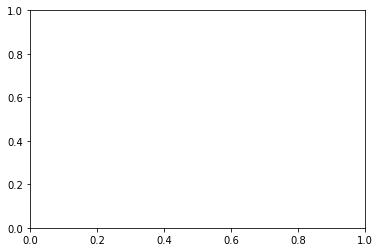

In [97]:
import seaborn as sns

# Documentation seaborn: https://seaborn.pydata.org/tutorial/distributions.html
sns.distplot(drugs_db.route_of_administration.dropna())


1145